In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("Position_Salaries.csv")

In [3]:
ds.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
ds

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
X = ds.iloc[:,1:-1].values
Y = ds.iloc[:,-1].values

In [6]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [7]:
Y 

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ssx = StandardScaler()
Xs = ssx.fit_transform(X)
ssy = StandardScaler()
Ys = ssy.fit_transform(Y.reshape(len(Y),1))

In [10]:
from sklearn.svm import SVR

In [11]:
regressor = SVR(kernel="rbf")

In [12]:
regressor.fit(Xs,Ys.reshape(len(Ys)))

SVR()

In [13]:
Ypred = regressor.predict(Xs)

In [14]:
Xgrid = np.arange(np.min(X),np.max(X),0.1);
Xgrid = Xgrid.reshape(len(Xgrid),1)

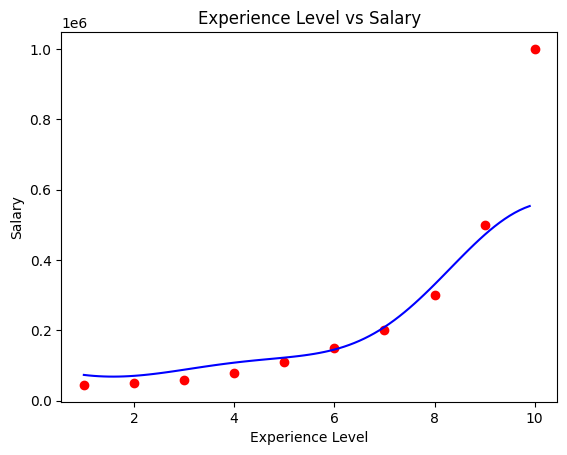

In [15]:
plt.scatter(X,Y,color="red")
plt.plot(Xgrid,ssy.inverse_transform(regressor.predict(ssx.transform(Xgrid)).reshape(len(Xgrid),1)),color = "blue")
plt.title("Experience Level vs Salary")
plt.xlabel("Experience Level")
plt.ylabel("Salary")
plt.show()